# Dataset from Kaggle:https://www.kaggle.com/datasets/patelprashant/employee-attrition

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from scipy.stats import uniform

# Data Preprocessing

In [10]:
df=pd.read_csv("/content/drive/MyDrive/Employee-Attrition.csv")

In [11]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [12]:
df.shape

(1470, 35)

In [13]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [15]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [16]:
df=df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1)

In [17]:

df.shape

(1470, 31)

# Plots

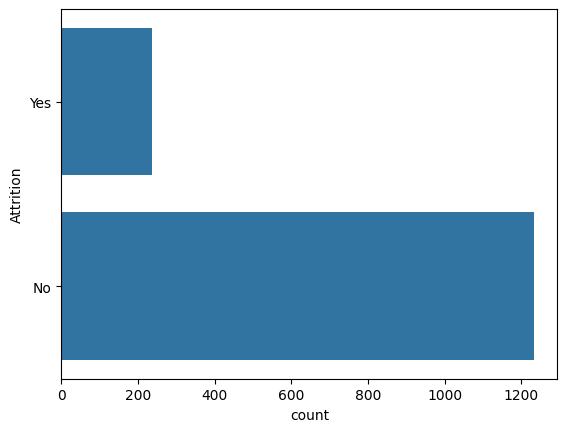

In [18]:
sns.countplot(df['Attrition'])
plt.show()

In [19]:
# Employees that left the company
(df.Attrition=='Yes').sum()

237

In [20]:
# Employees that are still in the company
(df.Attrition=='No').sum()

1233

In [21]:
#Transforming Categorical columns to Numerical
df = pd.get_dummies(data=df, drop_first=True)

In [22]:
corr=df.corr()

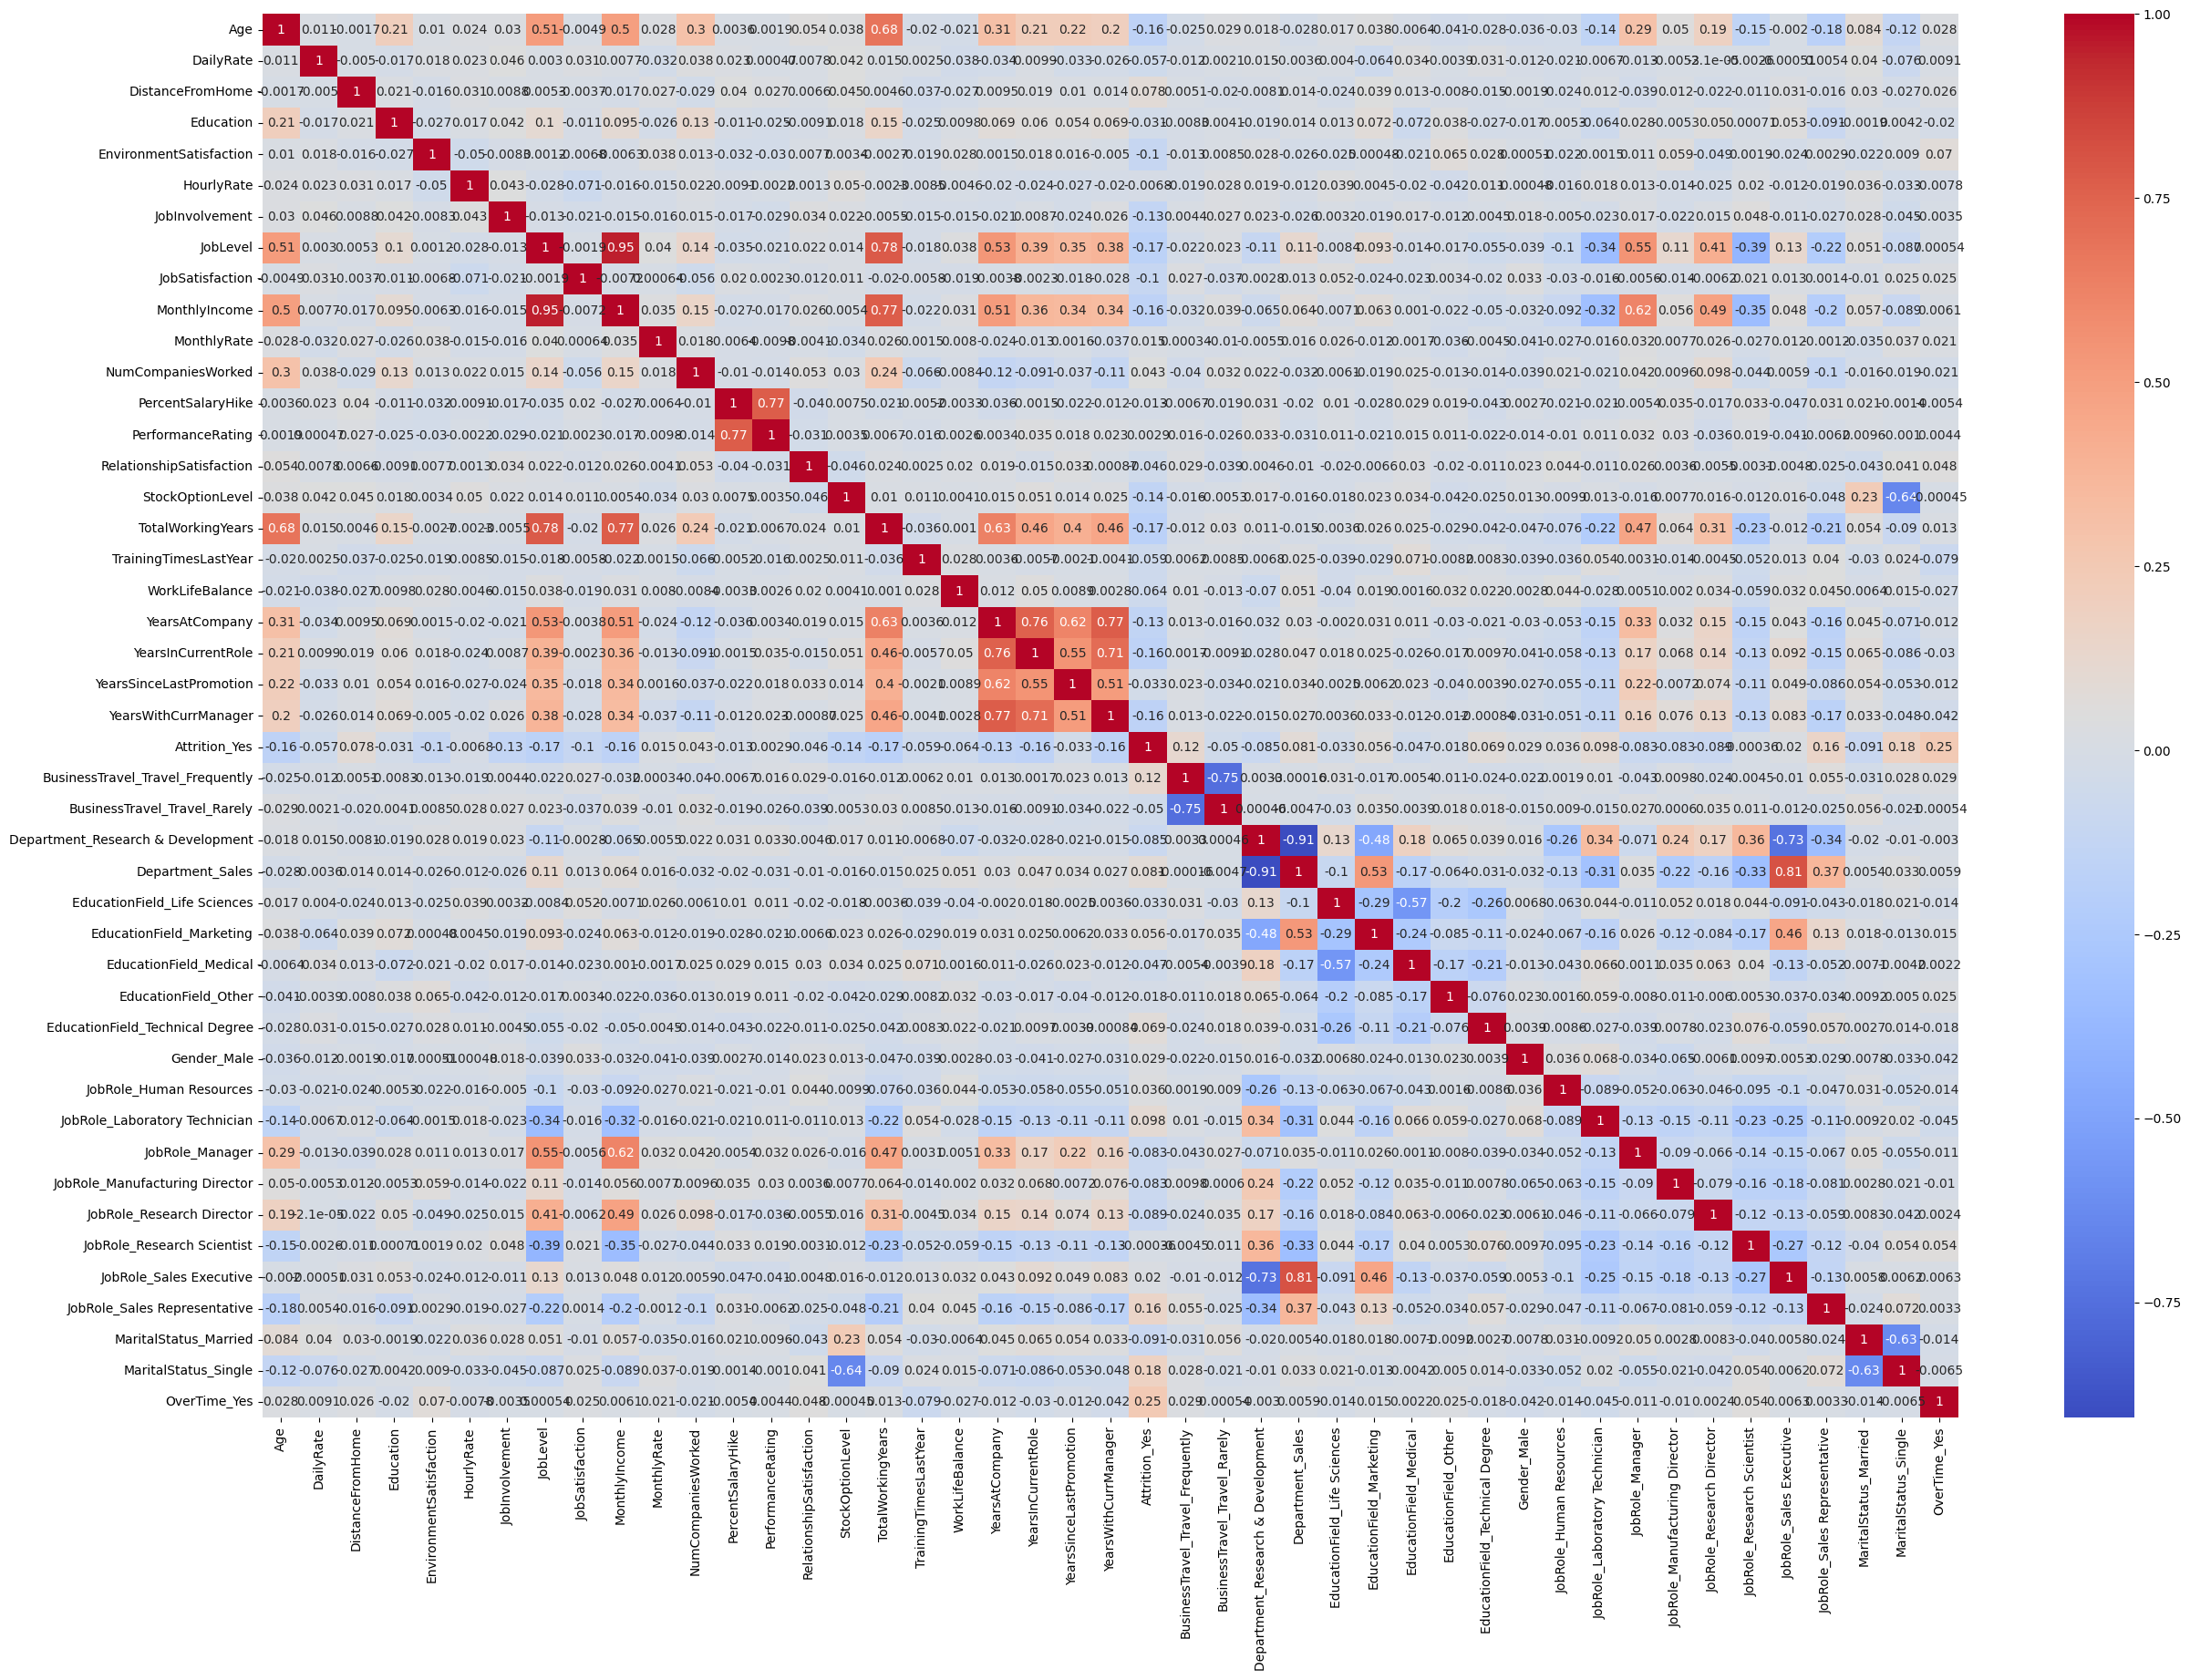

In [23]:
plt.figure(figsize=(30,20))
ax=sns.heatmap(corr,annot=True,cmap='coolwarm')

In [24]:
df.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,False,False,False,False,False,True,False,False,True,True
1,49,279,8,1,3,61,2,2,2,5130,...,False,False,False,False,True,False,False,True,False,False
2,37,1373,2,2,4,92,2,1,3,2090,...,True,False,False,False,False,False,False,False,True,True
3,33,1392,3,4,4,56,3,1,3,2909,...,False,False,False,False,True,False,False,True,False,True
4,27,591,2,1,1,40,3,1,2,3468,...,True,False,False,False,False,False,False,True,False,False


In [25]:
df.rename(columns={'Attrition_Yes':'Attrition'},inplace=True)

In [26]:
df.head().T

,0,1,2,3,4
Age,41,49,37,33,27
DailyRate,1102,279,1373,1392,591
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EnvironmentSatisfaction,2,3,4,4,1
HourlyRate,94,61,92,56,40
JobInvolvement,3,2,2,3,3
JobLevel,2,2,1,1,1
JobSatisfaction,4,2,3,3,2
MonthlyIncome,5993,5130,2090,2909,3468


In [27]:
X=df.drop('Attrition',axis=1)
y=df['Attrition']

# Spliting the Dataset and Feature Scalling

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [30]:
X_train.shape,y_train.shape

((1176, 44), (1176,))

In [31]:
X_test.shape,y_test.shape

((294, 44), (294,))

In [32]:
X_train

array([[-1.38855944, -1.10813858,  1.44039645, ..., -0.93733358,
        -0.66288195, -0.63641018],
       [-2.04073779, -1.2634814 , -0.52269928, ..., -0.93733358,
         1.50856422, -0.63641018],
       [-0.84507748,  1.10364737,  1.31770296, ..., -0.93733358,
        -0.66288195, -0.63641018],
       ...,
       [-1.60595222,  1.1258392 , -0.76808624, ...,  1.06685604,
        -0.66288195,  1.57131364],
       [-0.84507748,  1.42666182,  0.45884859, ...,  1.06685604,
        -0.66288195,  1.57131364],
       [ 1.43754676, -1.32019386, -0.03192534, ...,  1.06685604,
        -0.66288195,  1.57131364]])

In [33]:
X_test

array([[-0.95377387,  0.16419314, -0.52269928, ..., -0.93733358,
         1.50856422, -0.63641018],
       [ 1.76363593,  0.70172863,  0.45884859, ..., -0.93733358,
        -0.66288195, -0.63641018],
       [-1.38855944, -1.37937208,  1.56308993, ...,  1.06685604,
        -0.66288195, -0.63641018],
       ...,
       [ 1.43754676,  1.28857931,  2.29925083, ...,  1.06685604,
        -0.66288195,  1.57131364],
       [ 0.02449366,  1.04940067,  0.09076814, ..., -0.93733358,
         1.50856422, -0.63641018],
       [ 1.11145758, -1.35718025, -0.89077972, ...,  1.06685604,
        -0.66288195,  1.57131364]])

# Selecting Models

# Logistic Regression

In [34]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [35]:
acc=accuracy_score(y_test,y_pred)
print(acc*100)

88.09523809523809


In [36]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[241,  14],
       [ 21,  18]])

# Random Forest Classifier

In [37]:
model2=RandomForestClassifier()
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)

In [38]:
acc=accuracy_score(y_test,y_pred)
print(acc*100)

87.75510204081633


In [39]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[254,   1],
       [ 35,   4]])

# Surport Vector Classification

In [40]:
model3=SVC()
model3.fit(X_train,y_train)
y_pred=model3.predict(X_test)

In [41]:
acc=accuracy_score(y_test,y_pred)
print(acc*100)

89.79591836734694


In [42]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[254,   1],
       [ 29,  10]])

# TUning using Randomized SerchCV

In [48]:
parameters = {
    'C': uniform(0.1, 10),
    'gamma': uniform(0.001, 1),
    'kernel': ['rbf', 'linear']
}

In [53]:
rs=RandomizedSearchCV(estimator=model3,param_distributions=parameters,n_iter=10,scoring='roc_auc',n_jobs=1,cv=5,verbose=3)

In [50]:
rs.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=7.361641548209015, gamma=0.3646080713959313, kernel=linear;, score=0.840 total time=   1.6s
[CV 2/5] END C=7.361641548209015, gamma=0.3646080713959313, kernel=linear;, score=0.828 total time=   0.6s
[CV 3/5] END C=7.361641548209015, gamma=0.3646080713959313, kernel=linear;, score=0.807 total time=   0.9s
[CV 4/5] END C=7.361641548209015, gamma=0.3646080713959313, kernel=linear;, score=0.802 total time=   0.4s
[CV 5/5] END C=7.361641548209015, gamma=0.3646080713959313, kernel=linear;, score=0.855 total time=   0.6s
[CV 1/5] END C=0.876074420167876, gamma=0.7384257372184994, kernel=rbf;, score=0.590 total time=   0.1s
[CV 2/5] END C=0.876074420167876, gamma=0.7384257372184994, kernel=rbf;, score=0.605 total time=   0.1s
[CV 3/5] END C=0.876074420167876, gamma=0.7384257372184994, kernel=rbf;, score=0.533 total time=   0.1s
[CV 4/5] END C=0.876074420167876, gamma=0.7384257372184994, kernel=rbf;, score=0.579 total t

RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c95dfedd510>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c95e4ae1a20>,
                                        'kernel': ['rbf', 'linear']},
                   scoring='roc_auc', verbose=3)

In [51]:
rs.best_params_

{'C': 4.432830010503996, 'gamma': 0.9335410071557383, 'kernel': 'linear'}

In [52]:
rs.best_score_

0.8265485347985347